In [5]:
import numpy as np
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt

In [6]:
DATA_DIR = '../data/'

In [7]:
img1 = cv2.imread(DATA_DIR + 'rgb/1311877812.989574.png')
img2 = cv2.imread(DATA_DIR + 'rgb/1311877815.792670.png')
# img2 = cv2.imread(DATA_DIR + 'rgb/1311877822.957397.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY) 
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY) 

# Initiate SIFT detector
# IMPORTANT: ORB_create() instead of ORB()
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
# kp:  key points
# des: descriptors
kp1, des1 = orb.detectAndCompute(img1, None) 
kp2, des2 = orb.detectAndCompute(img2, None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

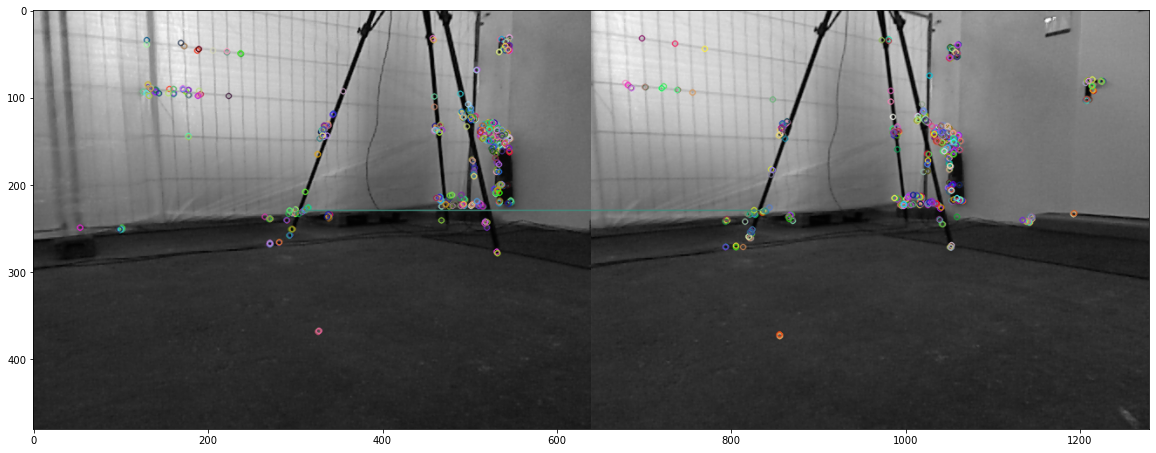

(<matplotlib.image.AxesImage at 0x7fdea8db14c0>, None)

In [8]:
# # Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:1],None)

plt.figure(figsize = (20,30))
plt.imshow(img3),plt.show()

In [5]:
print(kp1[matches[0].queryIdx].pt, kp2[matches[0].trainIdx].pt)

(311.0400695800781, 228.9254913330078) (199.06564331054688, 228.9254913330078)


In [6]:
kp1[1].pt

(99.0, 251.0)

In [7]:
matches[:1]

[<DMatch 0x7ff081b35e10>]

In [5]:
depth = cv2.imread(DATA_DIR + 'depth_gray/1311877812.987032.png', cv2.IMREAD_GRAYSCALE)
depth[100:110,100:110]

array([[59, 59, 60, 60, 60, 60, 60, 60, 60, 60],
       [60, 59, 60, 60, 60, 60, 60, 60, 60, 60],
       [59, 59, 59, 59, 59, 60, 60, 60, 60, 60],
       [60, 59, 59, 59, 59, 60, 60, 60, 60, 60],
       [59, 59, 59, 59, 59, 59, 60, 60, 60, 60],
       [60, 60, 59, 59, 59, 59, 60, 60, 60, 60],
       [59, 59, 59, 59, 59, 59, 59, 60, 60, 60],
       [59, 60, 59, 59, 59, 59, 59, 59, 60, 60],
       [59, 60, 60, 59, 59, 59, 59, 59, 60, 60],
       [59, 60, 60, 59, 59, 59, 60, 59, 60, 60]], dtype=uint8)

In [8]:
np.max(depth)

109

In [4]:
img1 = cv2.imread(DATA_DIR + 'rgb/1311877812.989574.png')
img1.shape

(480, 640, 3)

In [17]:
max_val = -10000
for i in range(len(matches)):
    if kp1[matches[i].queryIdx].pt[0] > max_val:
        max_val = kp1[matches[i].queryIdx].pt[0]
print(max_val)

548.4000244140625


In [14]:
kp1[matches[i].queryIdx].pt[0]

292.62652587890625